# bayesianchangepoint 


In [88]:
import numpy as np
import time
import sys
# change the following path to your local repository of energyanalytics
mod_path = '/Users/Simo//Documents/energyanalytics/ChangepointAlg/bayesianchangepoint'
if not (mod_path in sys.path):
    sys.path.insert(0, mod_path)
    
from bayesianchangepoint import bcp
# make sure that the code is loaded to the lastest version
reload(bcp)


<module 'bayesianchangepoint.bcp' from '/Users/Simo//Documents/energyanalytics/ChangepointAlg/bayesianchangepoint/bayesianchangepoint/bcp.pyc'>

In [2]:
import numpy as np
import time
import sys
# change the following path to your local repository of energyanalytics
mod_path = '/Users/Simo//Documents/energyanalytics/energyanalytics/source/disaggregation'
if not (mod_path in sys.path):
    sys.path.insert(0, mod_path)
    
from bayesian_cp_detect import bayesian_cp_3 as bcp
from bayesian_cp_detect import cp_detect
from bayesian_cp_detect.example import Dissagregation_functions as example
# make sure that the code is loaded to the lastest version
reload(bcp)

<module 'bayesian_cp_detect.bayesian_cp_3' from '/Users/Simo//Documents/energyanalytics/energyanalytics/source/disaggregation/bayesian_cp_detect/bayesian_cp_3.pyc'>

In [121]:
def readfile(f,Col): #read .csv files
    data=[]
    time=[]
    #head=''
    lines = f.readlines()
    #label=[]
    #head+=lines[0]
    for line in lines[1:]:
        line=line.strip('\n')
        line=line.split(',')
        tmp_time=float(line[0])
        tmp_data=0
        for i in range(len(Col)):
            tmp_data+=float(line[Col[i]])
        data.append(tmp_data),
        time.append(tmp_time),
    f.close()
    return (time,data)
# Change the following path to the local REDD file's path
filename='/Users/Simo/Desktop/equota/disaggrREDD/house1_output15s'
filext='.dat'
f_input = file(filename+filext,'r')

# By default we load all the App's data
AppNo=[3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20] #Choose App#
period=1440
# set which day you want to plot 
N=1
(t_all,y_all)=np.array(readfile(f_input,[i-2 for i in AppNo]))
# time axis
t=np.array([i+1 for i in range(period)])
# get the data of Nth day
y=y_all[N*period:(N+1)*period]
hazard_func = lambda r: bcp.constant_hazard(r, _lambda=1000)
test_signal = y[100:200]
start = time.time()
beliefs, maxes = bcp.inference(test_signal, hazard_func)
end = time.time()



AttributeError: 'module' object has no attribute 'inference'

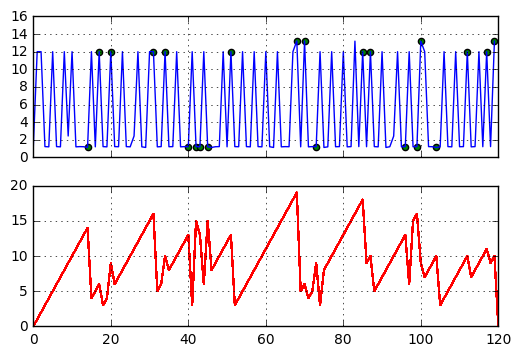

In [67]:
hazard_func = lambda r: bcp.constant_hazard(r, _lambda=1000)
beliefs, maxes = bcp.inference(test_signal, hazard_func)
test_signal = y
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows = 2, sharex = True)

ax[0].plot(test_signal)
#ax[1].imshow(-np.log(beliefs), interpolation='none', aspect='auto',
#               origin='lower', cmap=plt.cm.Blues)
ax[1].plot(maxes, color='r')
ax[1].set_xlim([0, len(test_signal)])
ax[1].set_ylim([0, ax[1].get_ylim()[1]])
ax[0].grid()
ax[1].grid()
index_changes = np.where(np.diff(maxes.T[0])<0)[0]
ax[0].scatter(index_changes, test_signal[index_changes],c='green');



In [26]:
beliefs




array([[  1.00000000e+00,   5.00000000e-02,   5.00000000e-02, ...,
          5.00000000e-02,   5.00000000e-02,   5.00000000e-02],
       [  0.00000000e+00,   9.50000000e-01,   1.54434138e-06, ...,
          3.81140367e-03,   3.72683097e-07,   2.68084233e-06],
       [  0.00000000e+00,   0.00000000e+00,   9.49998456e-01, ...,
          4.72093367e-05,   2.18605761e-04,   1.56302257e-07],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

# bayesian_changepoint_detection

In [69]:
import sys
# change the following path to your local repository of energyanalytics
mod_path = '/Users/Simo//Documents/energyanalytics/ChangepointAlg/bayesian_changepoint_detection'
if not (mod_path in sys.path):
    sys.path.insert(0, mod_path)
    

import bayesian_changepoint_detection.offline_changepoint_detection as offcd
from functools import partial

N = 60
period = 1440
data=y
Q, P, Pcp = offcd.offline_changepoint_detection(data, partial(offcd.const_prior, l=(len(data)+1)), offcd.gaussian_obs_log_likelihood, truncate=-40)


In [71]:
data1 = data[::-1]
Q1,P1,Pcp1 = offcd.offline_changepoint_detection(data1, partial(offcd.const_prior, l=(len(data1)+1)), offcd.gaussian_obs_log_likelihood, truncate=-40)

In [72]:
index_changes = np.where(np.exp(Pcp)>0.2)[1]
index_changes1 = [len(data1)-x for x in np.where(np.exp(Pcp1)>0.2)[1]]


In [75]:
duration_list = sorted(index_changes)
duration = [duration_list[i+1]-duration_list[i] for i in range(len(duration_list)-1)]
pd.DataFrame(duration).plot(kind = "density",figsize = (9,9),xlim = {-200,200})

TypeError: Empty 'DataFrame': no numeric data to plot

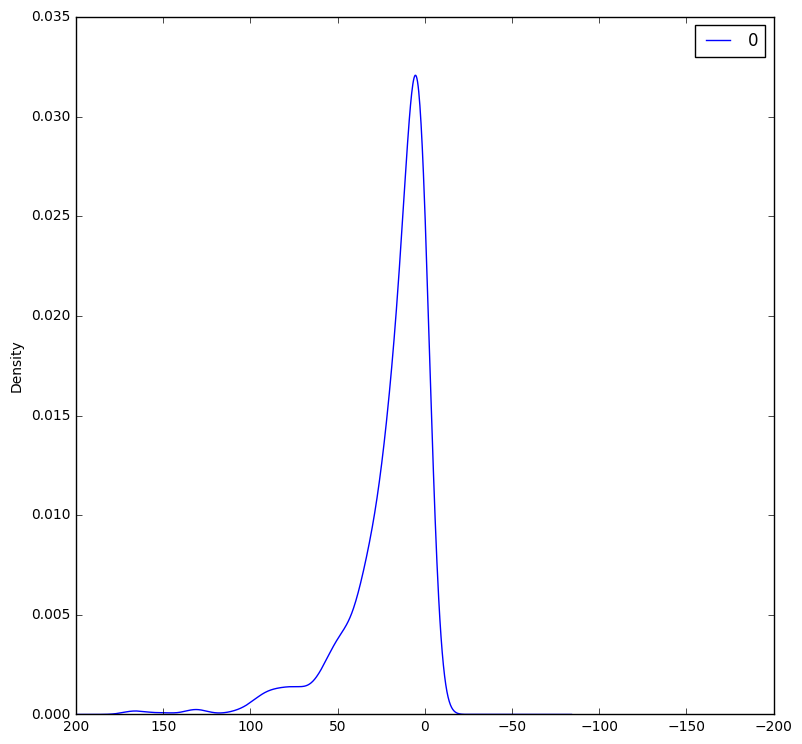

In [174]:
from functools import partial
duration = [x if x!=0 else 1e-8 for x in duration ]
#stats.exponweib.fit(duration)
shape, loc, scale = stats.weibull_min.fit(duration)
weibull_data = stats.weibull_min.rvs(shape,loc = loc,scale = scale,size = 1000)
#weibull_data = stats.exponweib.rvs(1,0.23,size = 3000)

pd.DataFrame(weibull_data).plot(kind = "density",figsize = (9,9),xlim = {-200,200})
# the hazard function
pdf = partial(stats.weibull_min.pdf,loc = loc,scale = scale)
cdf = partial(stats.weibull_min.pdf,loc = loc,scale = scale)
stats.weibull_min.pdf(10,shape,loc = loc,scale = scale)/(1-stats.weibull_min.cdf(10,shape,loc = loc,scale = scale))
def hazard_f(x):
    return pdf(x,shape)/(1-cdf(x,shape))
    
#plt.plot(duration, stats.exponweib.pdf(duration,*stats.exponweib.fit(duration, 1, 1, scale=2, loc=0)))
#_ = plt.hist(duration, bins=np.linspace(0, 16, 33), normed=True, alpha=0.5);
#plt.show()

In [175]:
hazard_f(10)

0.027518803582890231

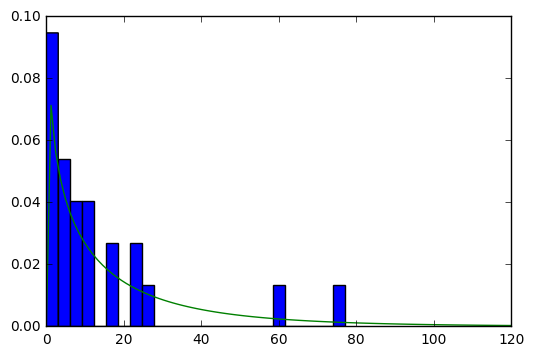

In [162]:
ydata=stats.weibull_min.pdf(np.linspace(0, 120, 100), shape, loc, scale)
plt.hist(duration, 25, normed=True)
plt.plot(np.linspace(0, 120, 100), ydata, '-')

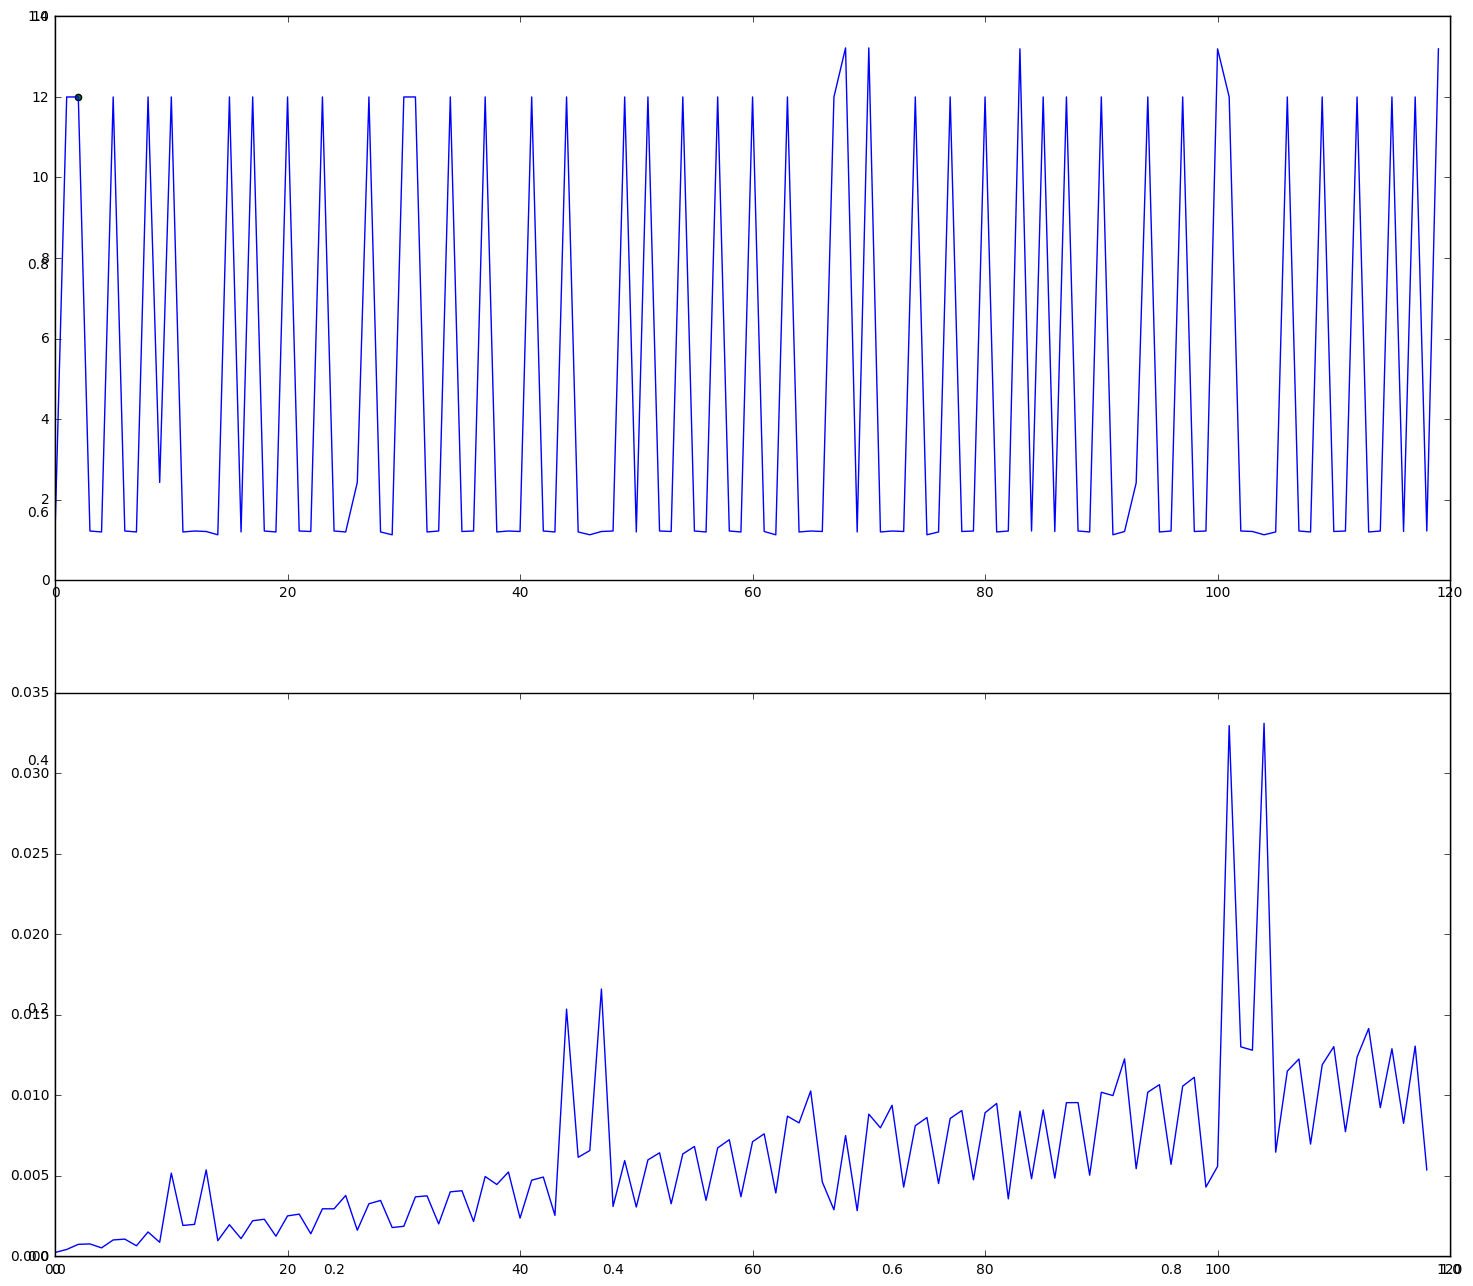

In [74]:
fig, ax = plt.subplots(figsize=[18, 16])
ax = fig.add_subplot(2, 1, 1)
ax.plot(data[:])
ax.scatter(index_changes,data[index_changes],c= 'green')
ax.scatter(index_changes1,data[index_changes1],c= 'green')
ax = fig.add_subplot(2, 1, 2, sharex=ax)
ax.plot(np.exp(Pcp).sum(0))



# plot the density

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats  as stats
%matplotlib inline

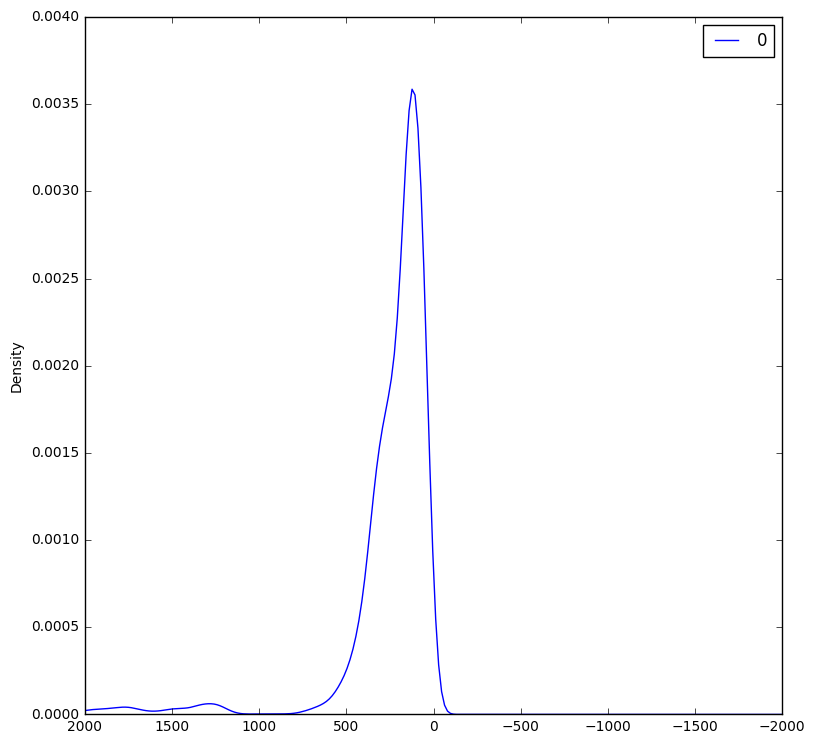

In [60]:
pd.DataFrame(y_all).plot(kind = "density",figsize = (9,9),xlim = {-2000,2000})

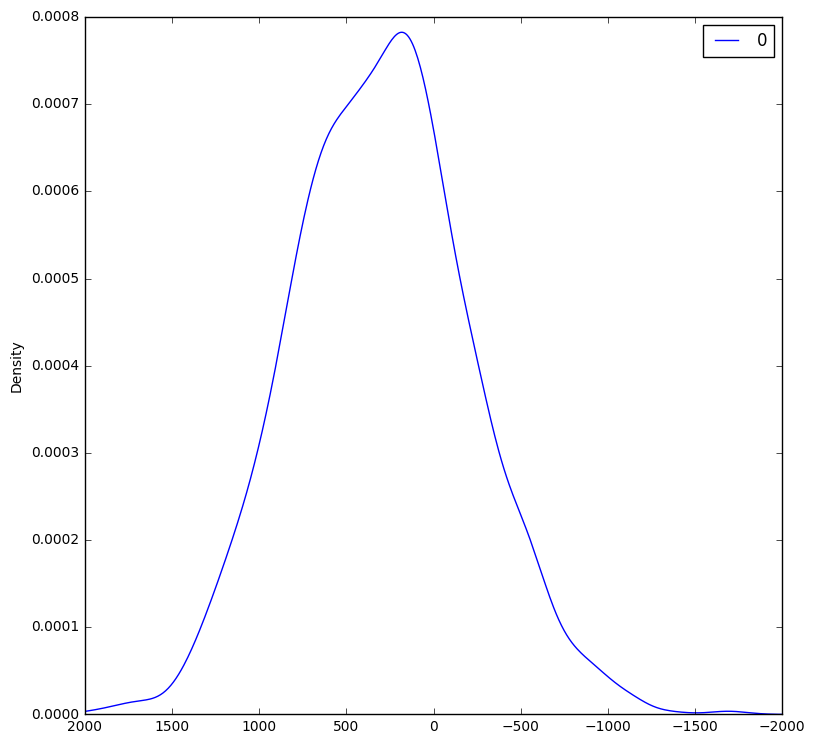

In [66]:
normal_data = stats.norm.rvs(size = 3000,loc = np.mean(y_all),scale = np.std(y_all))
pd.DataFrame(normal_data).plot(kind = "density",figsize = (9,9),xlim = {-2000,2000})

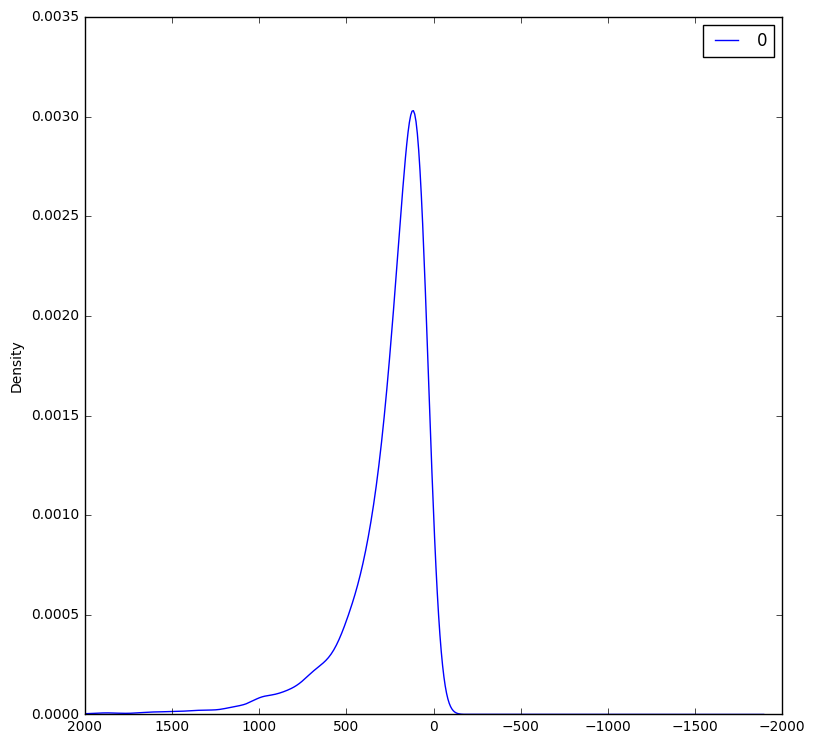

In [67]:
normal_data = stats.norm.rvs(size = 3000,loc = np.mean(np.log(y_all)),scale = np.std(np.log(y_all)))
pd.DataFrame(np.exp(normal_data)).plot(kind = "density",figsize = (9,9),xlim = {-2000,2000})

# Run test on our own data

In [4]:
import pandas as pd
appliance_list = ['3014','3015','3016','3017','3018','3019','3036','3037','3038','3039','3040']
#data = pd.DataFrame.from_csv('/Users/Simo/Desktop/equota/冷冻机房数据/data/3014.csv')
total_data = pd.DataFrame.from_csv('/Users/Simo/Desktop/equota/disagg/total.csv')
# resample total_data
total_data = total_data.resample('15T').pad()

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/numpy/core/_methods.py:55: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/numpy/core/_methods.py:77: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


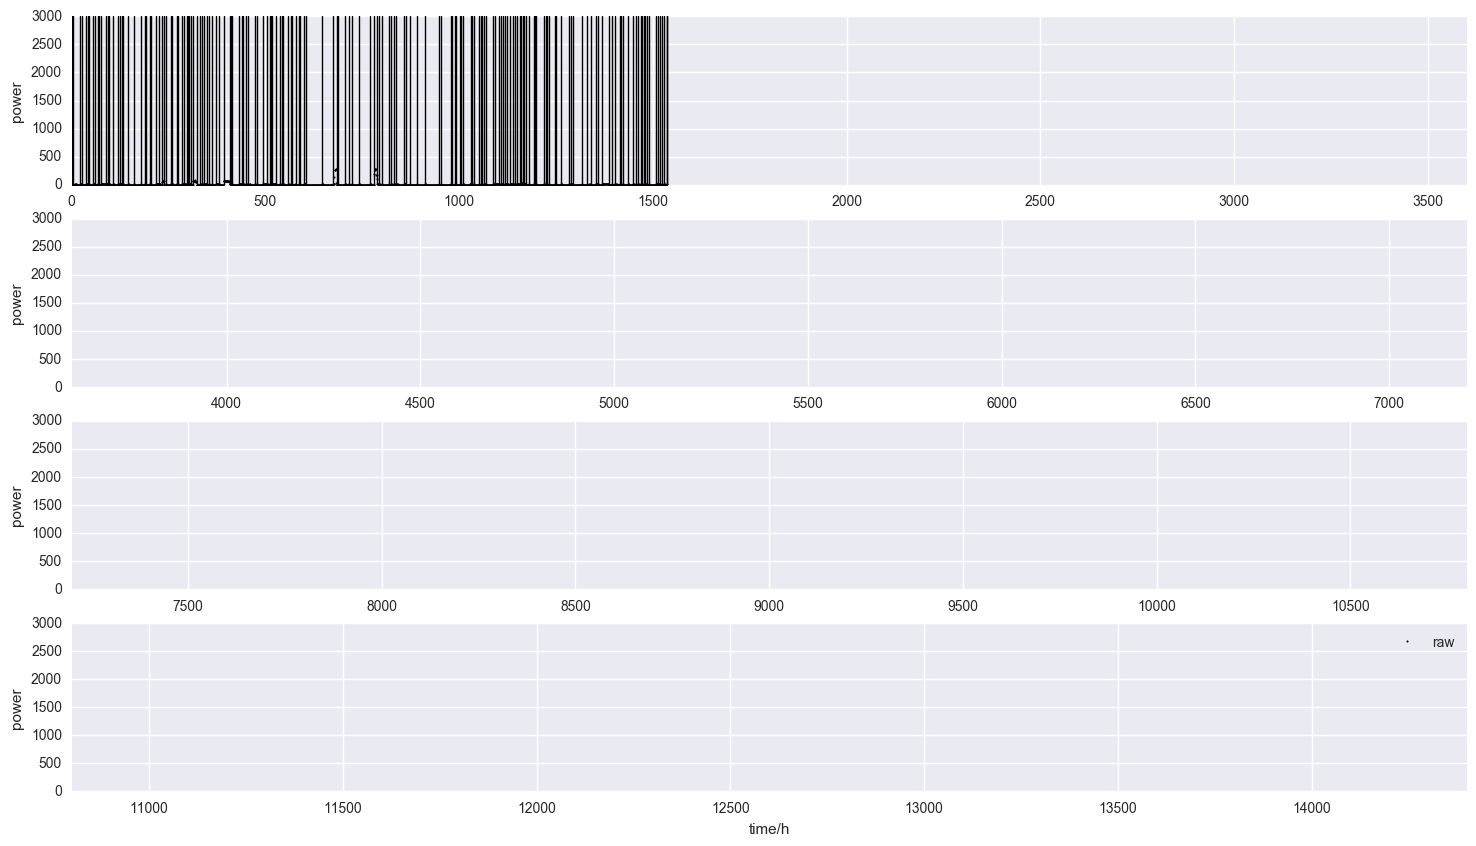

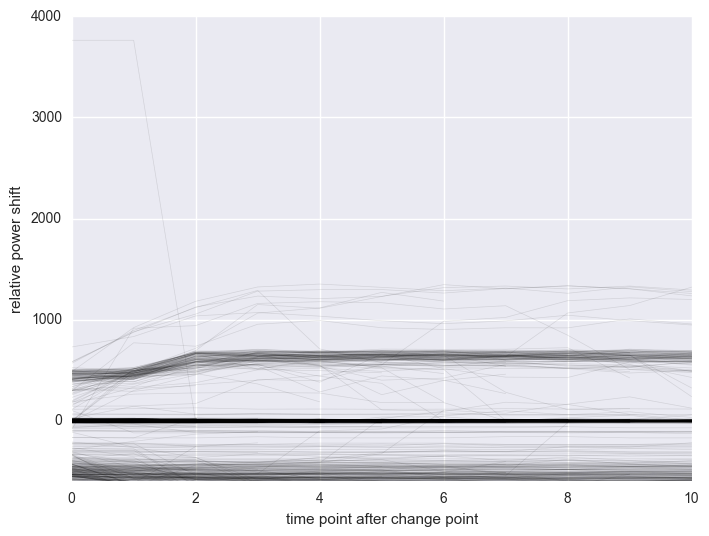

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

# pick values from certian date
show_start_date = '2017-02-12'
show_end_date = '2017-02-27'
y = total_data.loc[show_start_date:show_end_date]['P'].values
t=np.array([i+1 for i in range(len(y))])
t_2, y_2 = bcp.rel_change_filter_0819_3(t,y)
mu_list_list, sigma_list_list, prob_r_list_list, r_list_list = cp_detect.bayesian_change_point_4(y_2, r_blur=30)
changepoint, changepoint_p = cp_detect.get_change_point(prob_r_list_list)
changepoint.append(len(t_2)-1)
example.plot_24h_data(t_2,y_2,changepoint)

"""
Select a period of time and compute the clustering based on segments obtained by running the BCP algorithm
"""
start_date = '2017-01-11'
end_date = '2017-12-12'
y_all = total_data.loc[start_date:end_date].resample('15T').pad().values
t_all = [i for i in range(len(y_all))]
example.Computeandplotsegments(t_all = t_all,y_all = y_all, days = 200)

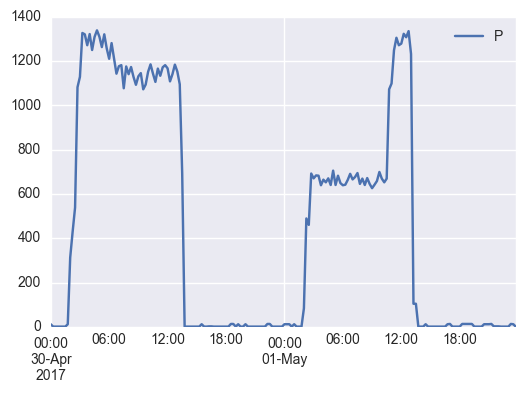

In [6]:
total_data.loc['2017-04-30':'2017-05-01'].plot()

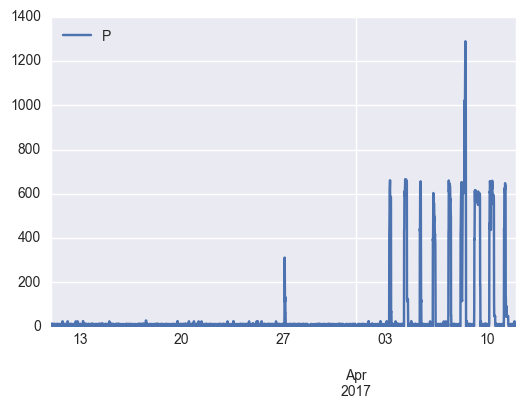

In [7]:
total_data.loc['2017-03-11':'2017-4-11'].plot()

In [8]:
data_list = ['3039_cooling_water_pump','3040_cooling_water_pump','3042_cooling_water_pump','4680_cooling_water_pump','3046_chiller','3047_chiller','3048_chiller','3053_chilled_water_pump','3054_chilled_water_pump','3055_chilled_water_pump','3056_chilled_water_pump']
data_dict = {}
for name in data_list:
    data_dict[name] = pd.DataFrame.from_csv('/Users/Simo/Desktop/equota/disagg/'+name+'.csv')

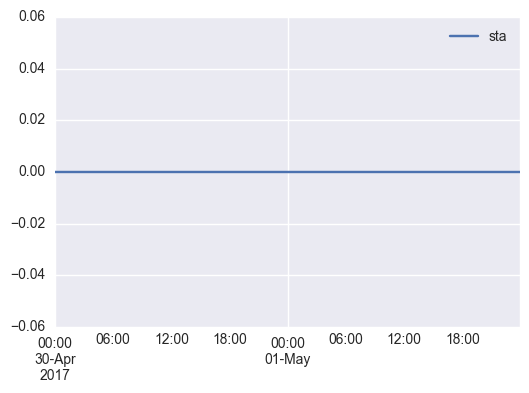

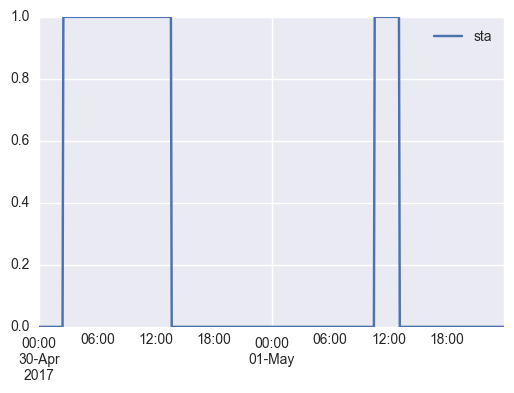

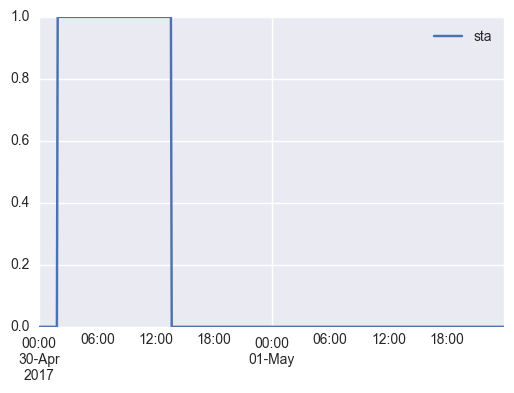

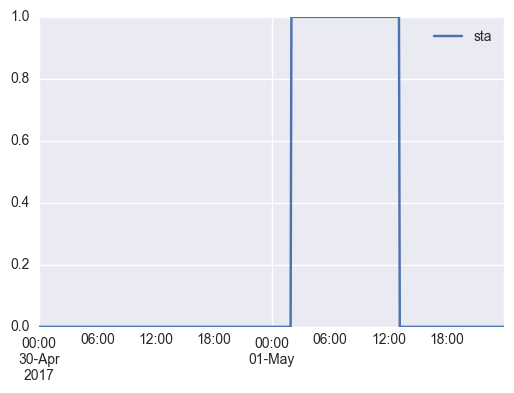

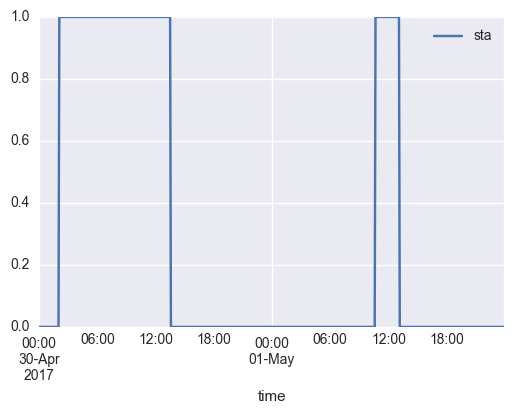

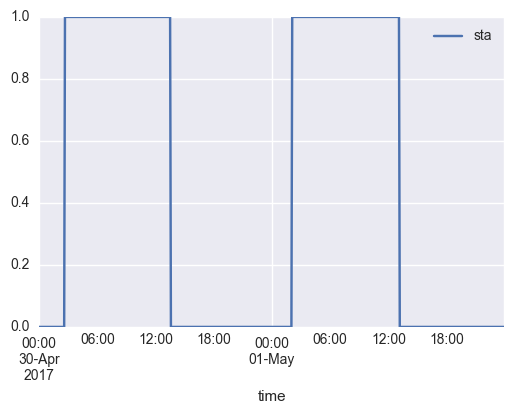

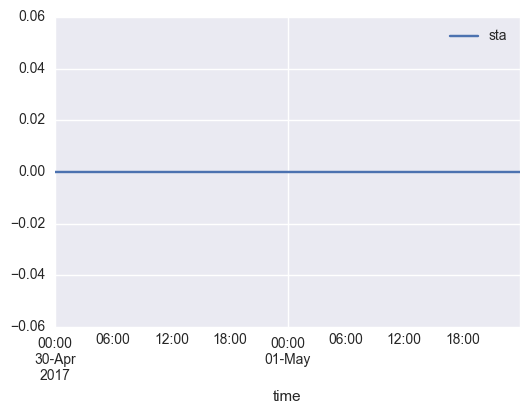

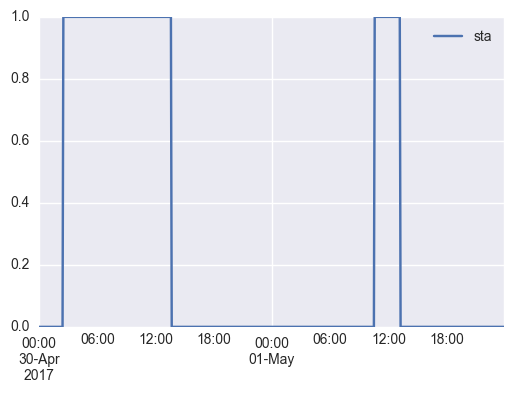

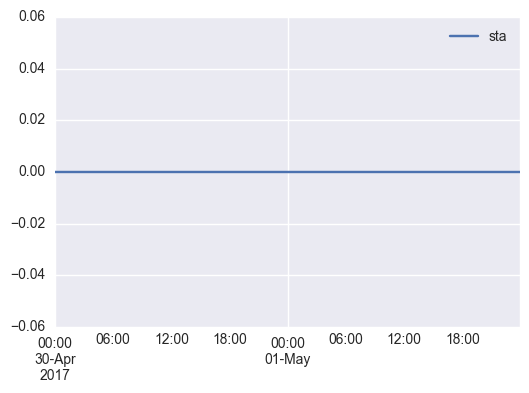

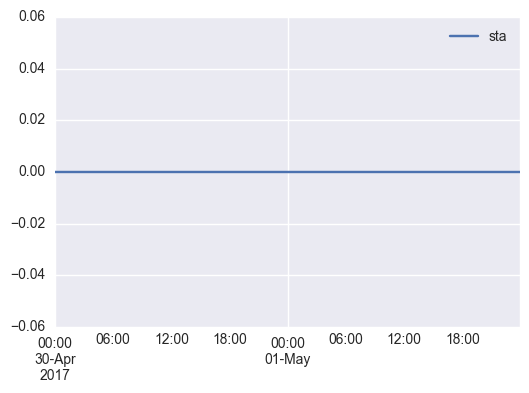

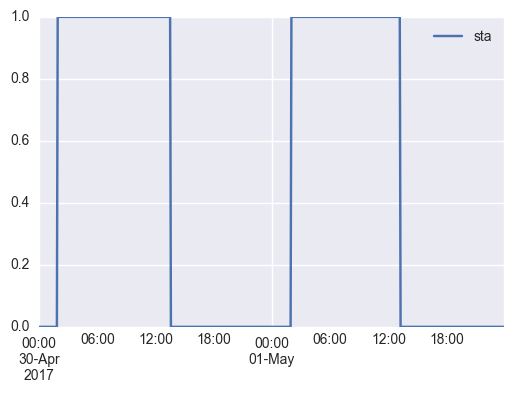

In [10]:
for name in data_list:
    data_dict[name].loc['2017-04-30':'2017-05-01'].plot()

# Clustering from history data

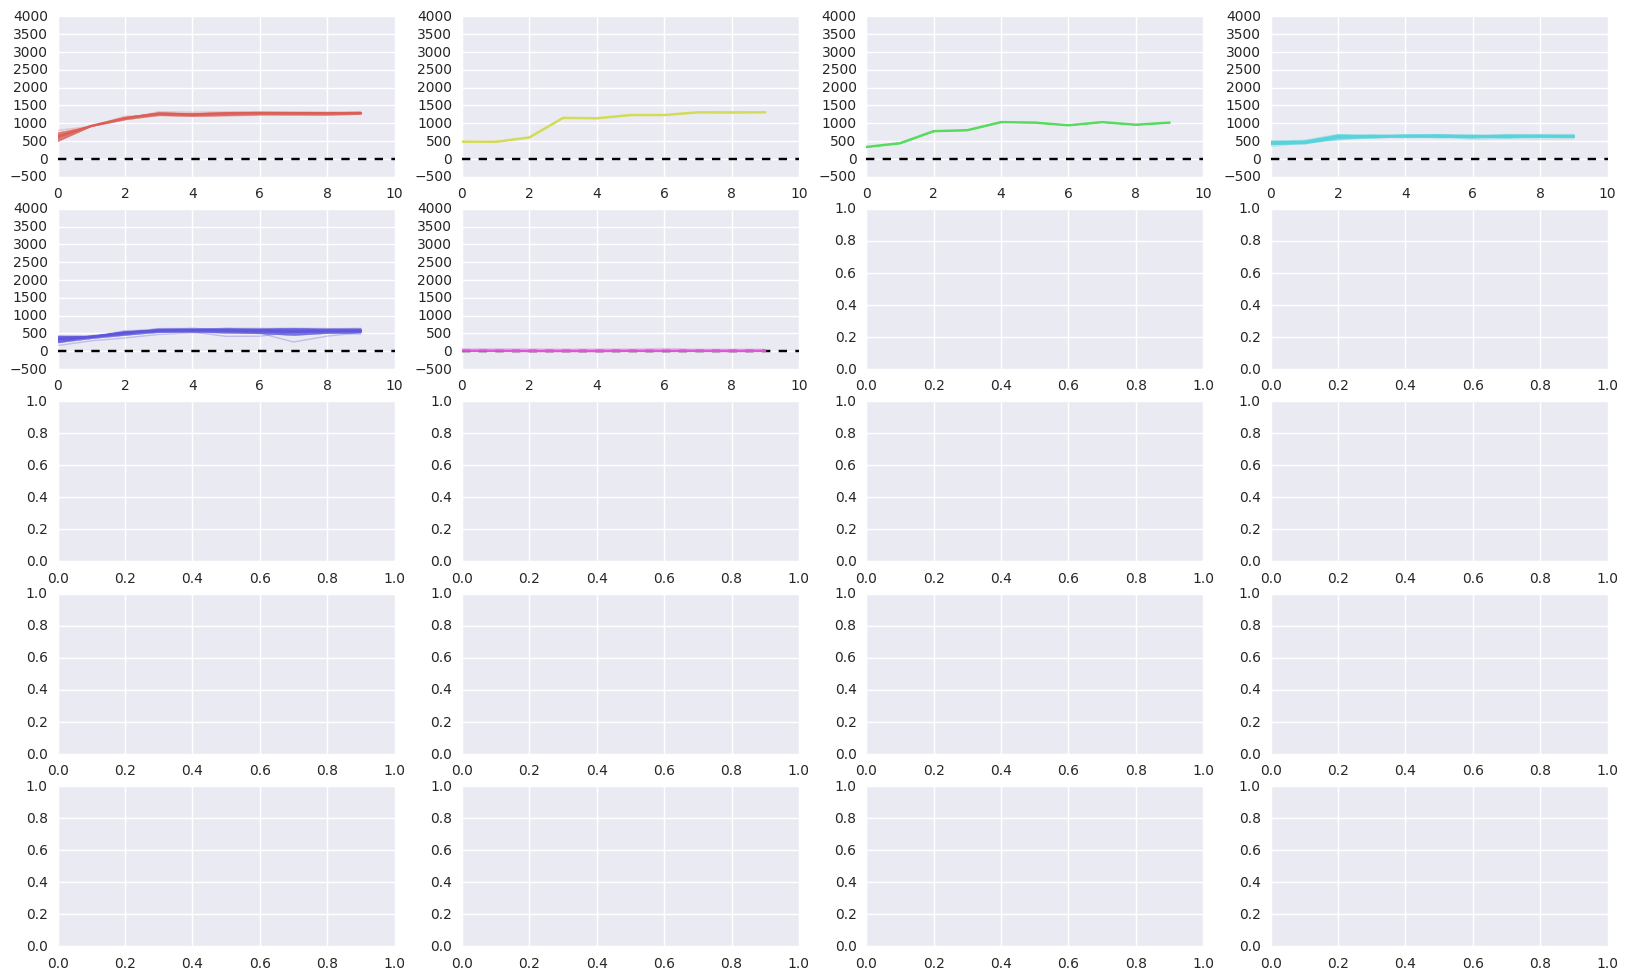

In [30]:
y_all = total_data.loc['2017-01-11':'2017-12-12'].resample('15T').pad().values
y_all = [x[0] for x in y_all]
cluster_mean,cluster_std,n_clusters,all_seg_per_cluster = example.integrated_clustering(t_all,y_all,num_of_days=200,period = 96,trim=10,min_n_clusters = 6, max_n_clusters=7)
example.plot_cluster_result(cluster_mean,cluster_std,n_clusters,all_seg_per_cluster)

4


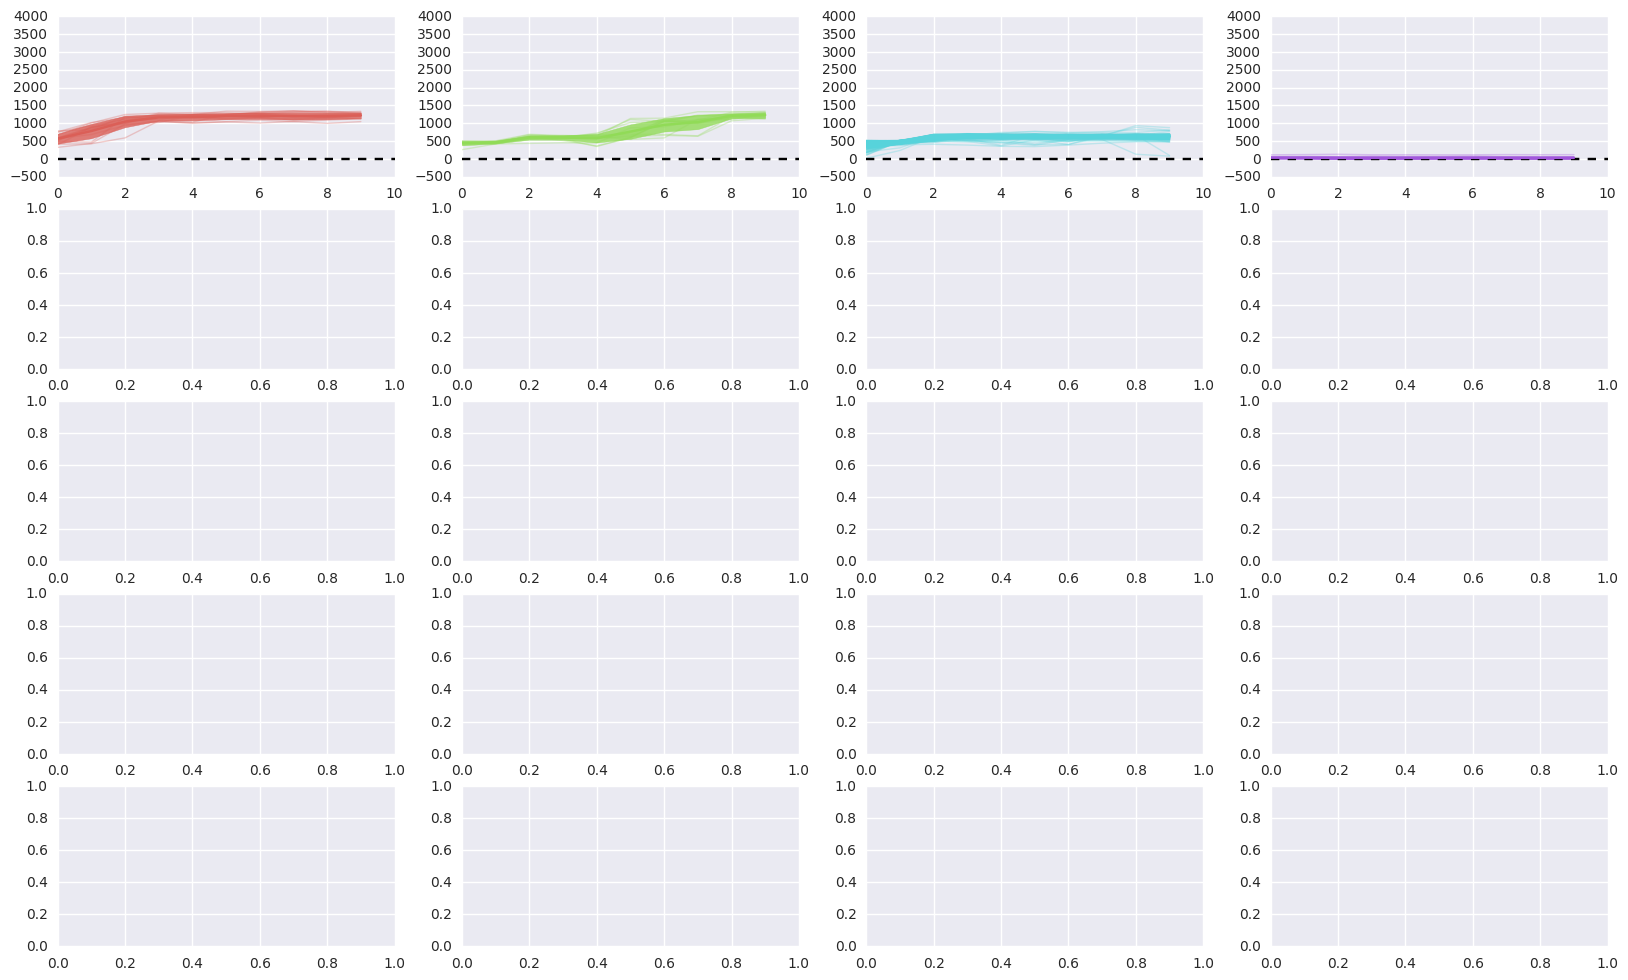

In [20]:
y_all = total_data.loc['2017-01-11':'2017-12-12'].resample('15T').pad().values
y_all = [x[0] for x in y_all]
cluster_mean,cluster_std,n_clusters,all_seg_per_cluster = example.integrated_clustering(t_all,y_all,num_of_days=300,period = 96,trim=10,min_n_clusters = 3, max_n_clusters=6)
plot_cluster_result(cluster_mean,cluster_std,n_clusters,all_seg_per_cluster)

In [233]:
import datetime
def get_nth_day_data(total_data,n=99):
    return [i[0] for i in total_data[(datetime.datetime.strptime('2017-01-11','%Y-%m-%d')+datetime.timedelta(days = n)).strftime("%Y-%m-%d"):(datetime.datetime.strptime('2017-01-11','%Y-%m-%d')+datetime.timedelta(days = n)).strftime("%Y-%m-%d")].resample('15T').pad().values]

def get_nth_day_separate_data(data_list = data_list,data_dict= data_dict)
    for name in data_list:
        data_dict[name].loc['2017-04-12':'2017-04-27'].plot()

In [21]:
cluster_mean_2 = []
cluster_mean_2.append(cluster_mean[0])
cluster_mean_2.append(cluster_mean[1])
cluster_mean_2.append(cluster_mean[2])


In [172]:
cluster_mean_2 = []
cluster_mean_2.append(np.array([500.0 for i in range(10)]))
cluster_mean_2.append(np.array([50.0 for i in range(10)]))
cluster_mean_2.append(np.array([80.0 for i in range(10)]))


In [ ]:
bcp.power_disaggregate(y_all,cluster_mean_2,)

[0, 3, 10, 16, 22, 83, 89]


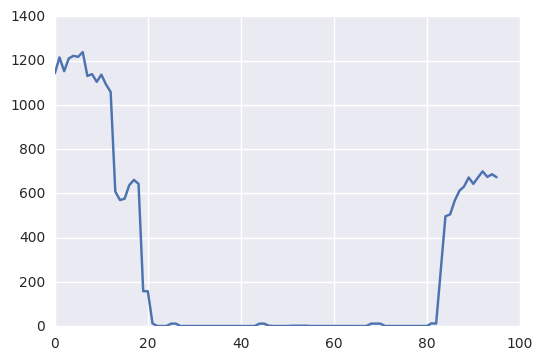

[0, 13, 19]
6
7
[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
6
7
630.0
630.0
630.0
630.0
500.0
500.0
500.0
0.0
0.0
500.0
500.0
630.0
[(0, 0, 0), (1, 0, 0), (0, 0, 0), (0, 1, 1), (0, 0, 0), (1, 0, 0), (1, 1, 1)]
[(1, 0, 0), (-1, 0, 0), (0, 1, 1), (0, -1, -1), (1, 0, 0), (0, 1, 1)]
[[0, 0, 0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 50.0, 50.0, 50.0, 

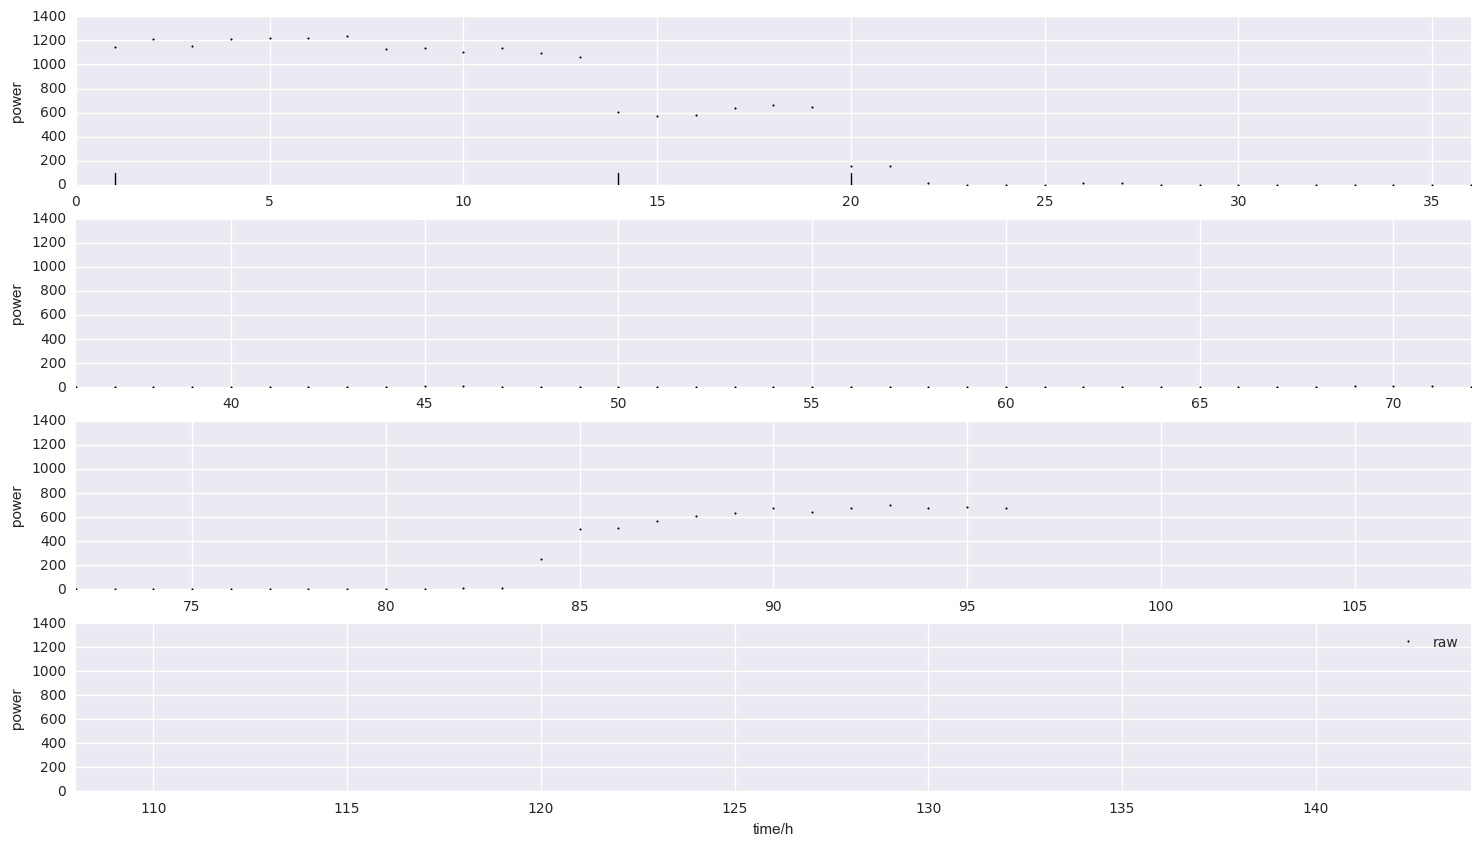

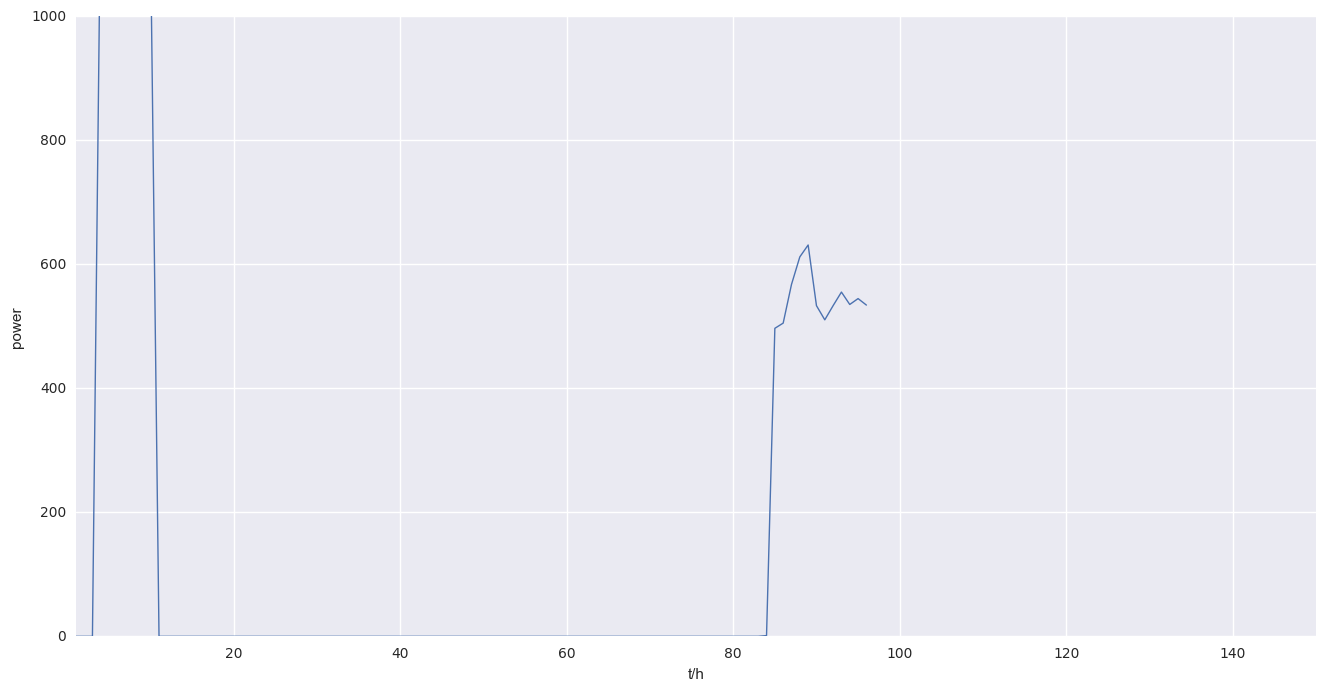

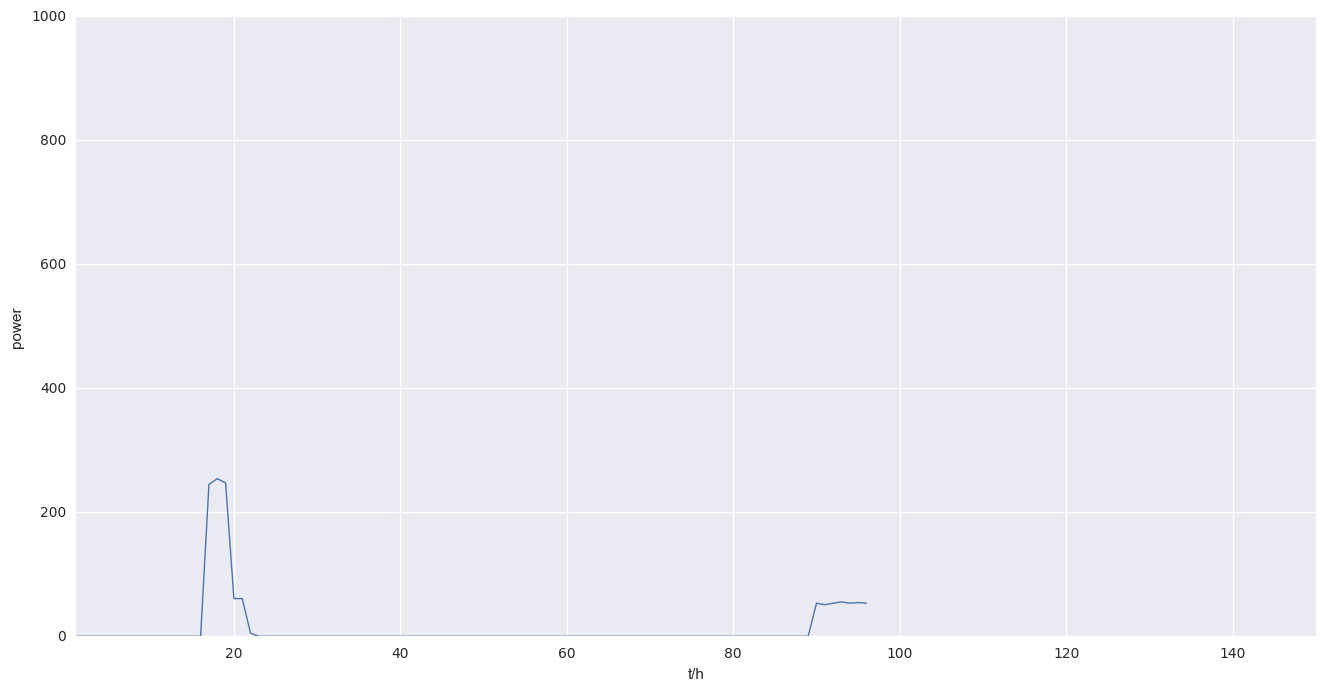

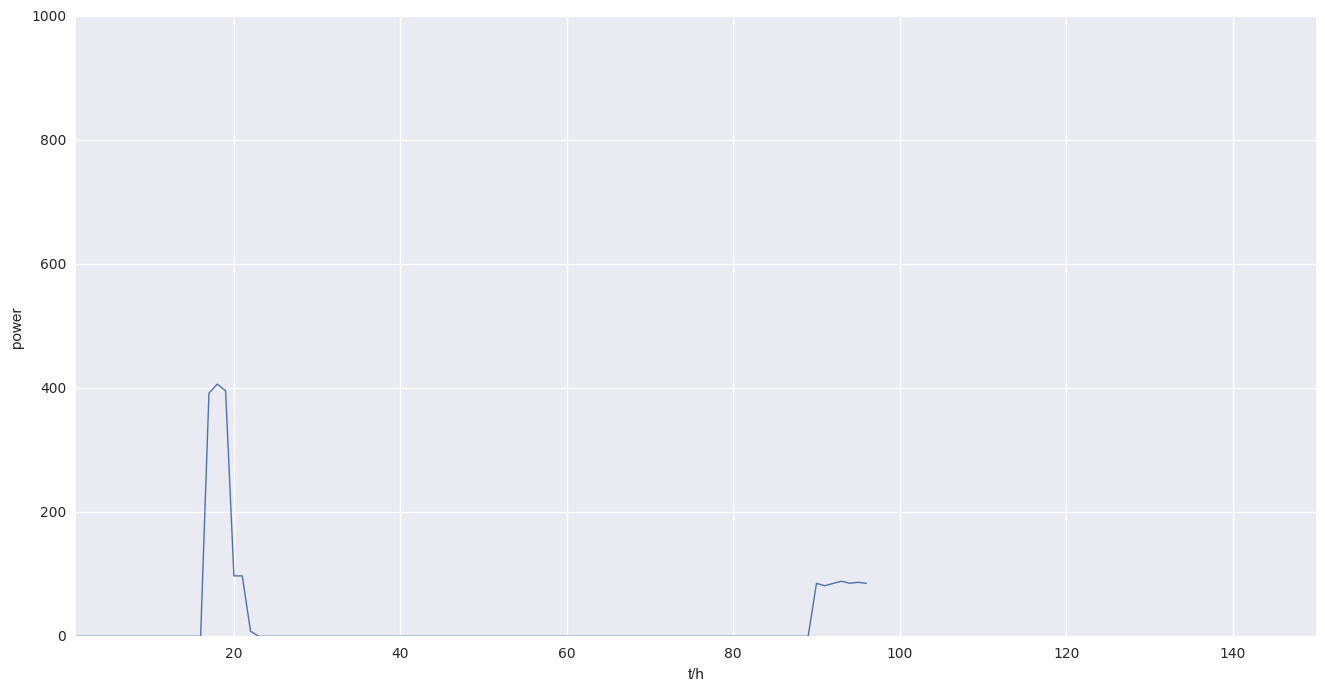

In [196]:
%matplotlib inline
reload(bcp)
period = 96
import copy
#reload(bcp)
# change the parameter day and make sure to construct the cluster_mean_2 before calling this function
predicted_profile = integrated_dissagregate(y_all,period,cluster_mean_2,day = 102,n_equipment_type = len(cluster_mean_2),n_equipment=[2 for i in range(1,len(cluster_mean_2)+1)],obs_mat=n_dimension_identity_matrix(cluster_mean_2),power_usage = [i.mean() for i in cluster_mean_2])  
#print predicted_profile
for i in range(len(predicted_profile)):
    #print len(predicted_profile[i]),len(np.array([i+1 for i in range(period)]))
    plot_dissagregation([predicted_profile[i]],np.array([i+1 for i in range(period)]))
    #plot_24h_data(np.array([i+1 for i in range(period)]),np.array(predicted_profile[i]),np.array[2])

[1]

In [234]:
get_nth_day_data(total_data,0)
#y_all[100*period:101*period]

[1.218756000045687,
 1.207031999983883,
 1.2011760000095821,
 1.2011760000095821,
 1.2011760000095821,
 2.414063999967766,
 1.2011639999946055,
 1.2011639999946055,
 1.2011639999946055,
 1.207031999983883,
 1.125,
 12.0,
 12.0,
 1.1953080000093903,
 1.2011639999946055,
 12.0,
 12.0,
 12.0,
 1.2011760000095821,
 1.2011760000095821,
 13.218743999954311,
 13.218743999954311,
 1.2011760000095821,
 1.2011760000095821,
 1.2011760000095821,
 1.218756000045687,
 12.0,
 1.2011639999946055,
 1.2011639999946055,
 1.218743999954313,
 1.207031999983883,
 1.1953199999916249,
 1.1953199999916249,
 12.0,
 1.125,
 1.2011639999946055,
 1.2011639999946055,
 1.2011639999946055,
 1.1953080000093903,
 1.218756000045687,
 1.218756000045687,
 1.218756000045687,
 1.207031999983883,
 1.2011760000095821,
 1.218743999954313,
 12.0,
 12.0,
 1.2011639999946055,
 1.2011639999946055,
 1.218756000045687,
 1.218756000045687,
 1.207031999983883,
 12.0,
 12.0,
 1.218743999954313,
 1.1953080000093903,
 1.2011639999946055,

In [151]:
%matplotlib inline
import datetime
def get_nth_day(total_data,n=99):
    return total_data[(datetime.datetime.strptime('2017-01-11','%Y-%m-%d')+datetime.timedelta(days = n)).strftime("%Y-%m-%d"):(datetime.datetime.strptime('2017-01-11','%Y-%m-%d')+datetime.timedelta(days = n)).strftime("%Y-%m-%d")].resample('15T').pad()

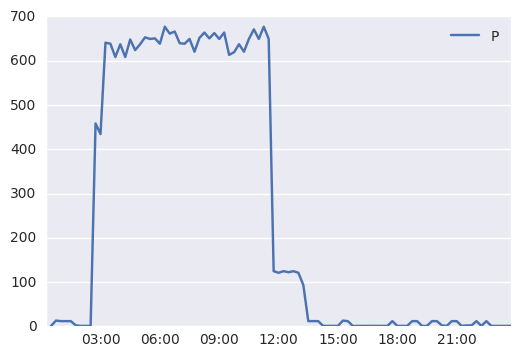

In [177]:
test = get_nth_day(total_data,n=99)
test.plot()

# Plot Real Data

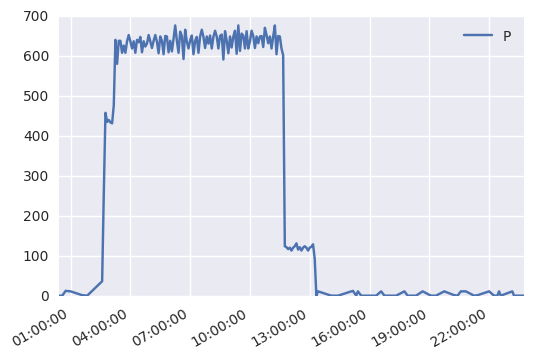

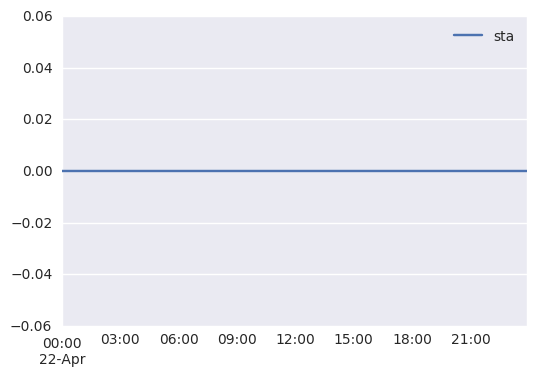

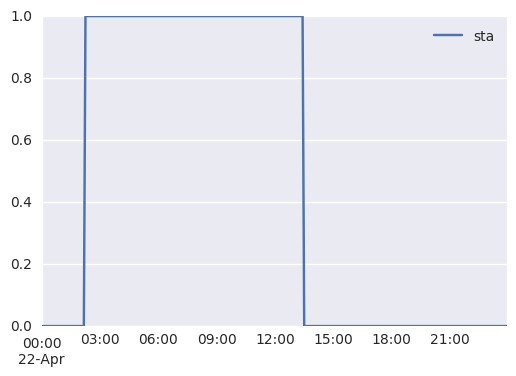

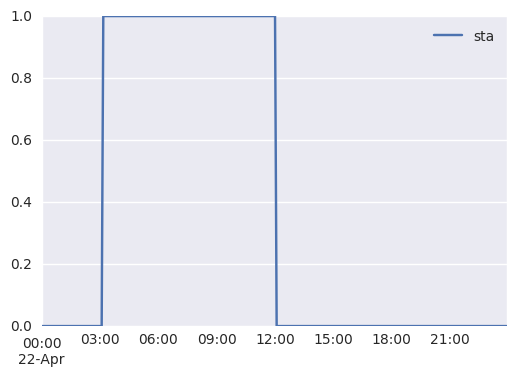

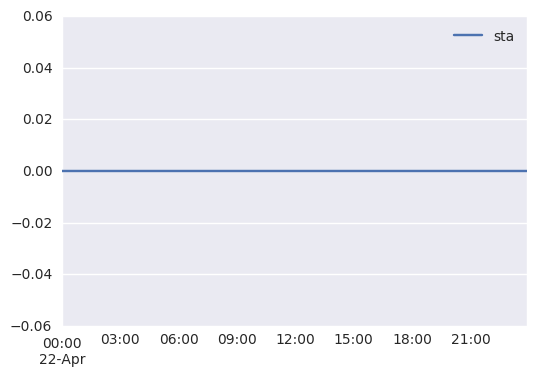

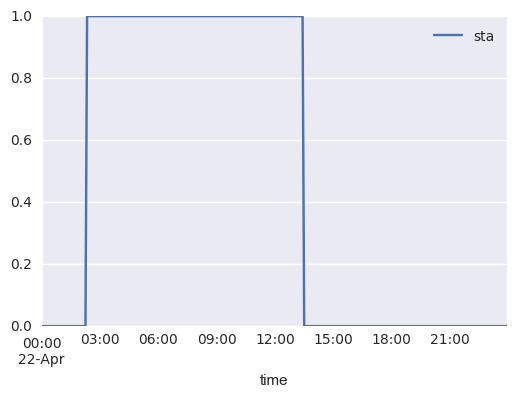

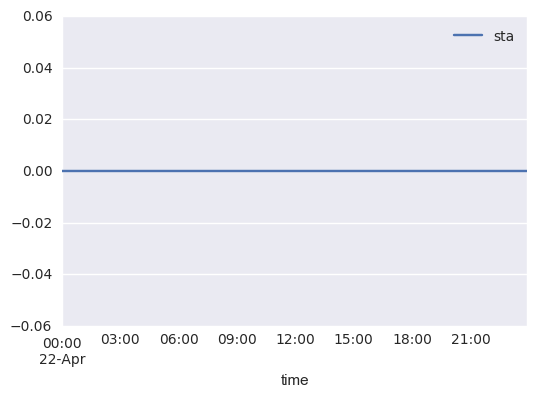

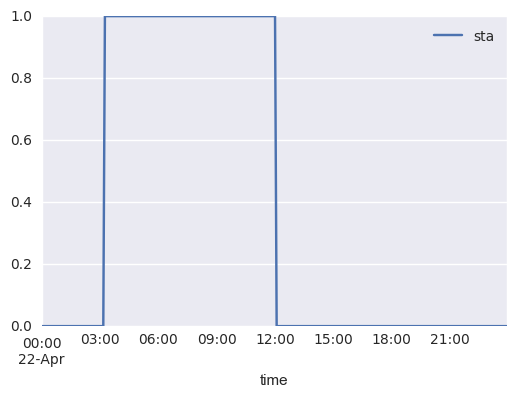

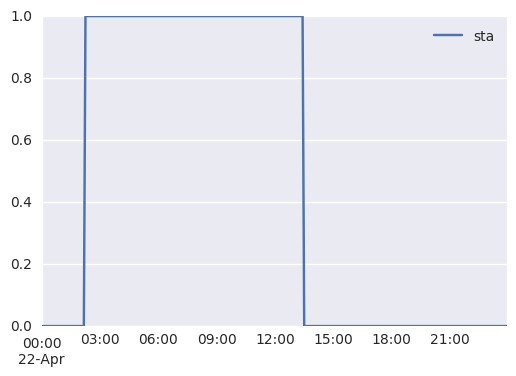

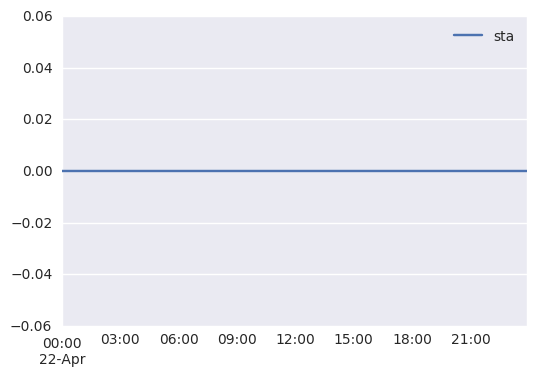

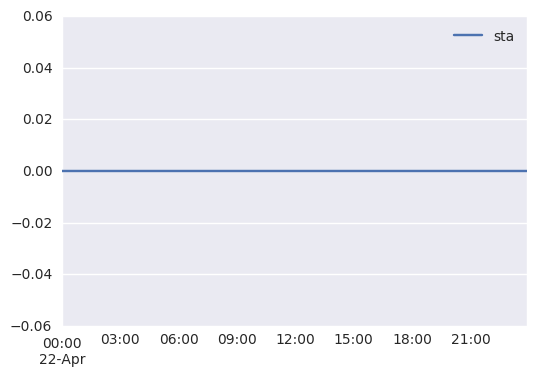

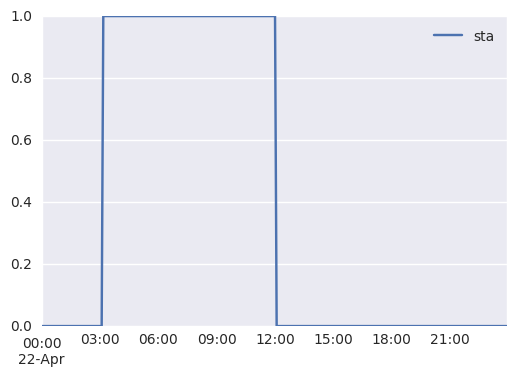

In [219]:

total_data.loc['2017-04-20':'2017-04-20'].plot()
for name in data_list:
    data_dict[name].loc['2017-04-22':'2017-04-22'].plot()

In [11]:
def n_dimension_identity_matrix(cluster_mean_2):
    to_return_list  = []
    for i in range(1,len(cluster_mean_2)+1):
        to_return_list.append([0 if j!=i else 1 for j in range(1,len(cluster_mean_2)+1)])
    return to_return_list

def DP_state_generation(N,k=1):
    if k==1:
        if N==1:
            return [[0],[1]]
        else:
            return_list = DP_state_generation(N-1)
            toreturn = []
            for i in return_list:
                #print i
                i.append(0)
                toreturn.append(copy.copy(i))
                i.pop()
                i.append(1)
                #print i
                toreturn.append(copy.copy(i))

            #print toreturn
            return toreturn
    

def generate_state_prob_list(N):
    toreturn = {}
    toreturnlist = DP_state_generation(N)
    k = 1/float(len(toreturnlist))
    for i in toreturnlist:
        toreturn[tuple(i)] = k
        
    return toreturn

def integrated_dissagregate(y_all,period,cluster_mean_2,day = 65,n_equipment_type = 4,n_equipment = [2,2,2,2],obs_mat = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]]),power_usage = [0,0,0,0]):
    
    opt = bcp.set_disaggregation_option(change_shape=cluster_mean_2, 
                               init_pos_std = np.sqrt([float(200/3), float(200/3), float(400/3), float(400/3)])
                                )
    
    t=np.array([i+1 for i in range(period)])
    data=y_all[(day)*period:(day+1)*period]
    cp_list = bcp.disaggregate(data,opt)
    
    #TEST CODE
    
    print cp_list
    
    t=np.array([i+1 for i in range(period)])
    y=y_all[day*period:(day+1)*period]
    t_2, y_2 = rel_change_filter_0819_3(t,y)
    mu_list_list, sigma_list_list, prob_r_list_list, r_list_list = cp_detect.bayesian_change_point_4(y_2, r_blur=30)
    changepoint, changepoint_p = cp_detect.get_change_point(prob_r_list_list)
    """ this part is totally heuristic"""
    if changepoint[-1]== len(t_2)-1:
        changepoint = changepoint[:-2]
    #changepoint.append(len(t_2)-1)

    cp_list_test = changepoint
    #cp_list = cp_list_test
    plot_24h_data(t_2,y_2,cp_list)
    %matplotlib inline
    plt.plot(np.array(y_2))
    plt.show()
    plot_24h_data(t_2,y_2,changepoint)
    
    print cp_list_test
    #cp_list = cp_list_test
    
    
    data_seg, n_seg, data_seg_raw_last = bcp.segment_data(data, cp_list)
    print len(data_seg)
    new_data_seg, new_n_seg, new_data_seg_raw_last = bcp.segment_data_new(data, cp_list)
    print len(new_data_seg)
    shape_matched = cluster_mean_2
    n_shape_matched = len(shape_matched)
    # need to add code here to allow more than one appliance for each shape 
    #all_shape_code = bcp.shape_code_gen(n_shape_matched)
    all_shape_code = bcp.shape_code_gen_new(n_shape_matched,n_equipment[0])
    print all_shape_code
    
    shape_dict = bcp.combine_shape(shape_matched, all_shape_code)
    # the probability of each shape change at each changepoint
    shape_prob_list = bcp.get_seg_prob(data_seg, shape_dict)
    print len(shape_prob_list)
    # the probability of each shape in each segment
    new_shape_prob_list = bcp.get_seg_prob_positive(new_data_seg, shape_dict)
    print len(new_shape_prob_list)
    
    #print shape_prob_list

    #shape_prob_list = bcp.get_seg_prob(data_seg, shape_dict)
  
    state_prob_list = generate_state_prob_list(len(cluster_mean_2))

    #obs_mat = np.array([[1,0,0,0,0],[0,1,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,1]])
    
    for item,keys in state_prob_list.iteritems():
        state_prob_list[item] = new_shape_prob_list[0][item]
    
    #trace_list, shape_list = bcp.viterbi(shape_prob_list, new_shape_prob_list[0], data_seg, obs_mat)
    #trace_list, shape_list = viterbi_new(shape_prob_list,state_prob_list,new_shape_prob_list,data_seg,obs_mat,power_usage)
    trace_list, shape_list = viterbi_for_missing_change_point(shape_prob_list,state_prob_list,new_shape_prob_list,data_seg,obs_mat,power_usage,alpha = 10)
    
    predicted_profile = bcp.generate_predicted_profile(cp_list, shape_matched, shape_list, data, n_equipment_type, obs_mat, trace_list)
    
    return predicted_profile

def plot_dissagregation(predicted_profile,t):
    plt.figure(figsize = [16,8])
    for tmp in predicted_profile:
        plt.plot(t,tmp,linewidth = 1)
    #plt.plot(t,data,'k.',markersize = 2)

    plt.xlim([1,150])
    plt.ylim([0,1000])
    plt.xlabel('t/h')
    plt.ylabel('power')
    
def plot_dissagregation_2(predicted_profile,t):
    plt.figure(figsize = [16,8])
    for key,tmp in predicted_profile.iteritems():
        plt.plot(t,tmp,linewidth = 1)
    #plt.plot(t,data,'k.',markersize = 2)

    plt.xlim([1,150])
    plt.ylim([0,3000])
    plt.xlabel('t/h')
    plt.ylabel('power')

def viterbi_for_missing_change_point(shape_prob_list, state_prob_list, boot_state_prob_list, data_seg, obs_mat, power_usage,alpha = 100):
    # originally shape means the 'change', state means the actual usage...

    n_seg = len(data_seg)
    
    state_prob_list_list = [state_prob_list]
    state_memory_list_list = []
    shape_memory_list_list = []
    
    for i_seg in range(n_seg):
        seg_mean = np.mean(data_seg[i_seg])

        next_state_prob_list = {t:0 for t in state_prob_list.keys()}
        state_memory_list = {t:0 for t in state_prob_list.keys()} #
        shape_memory_list = {t:0 for t in state_prob_list.keys()} #

        for next_state, next_state_prob in next_state_prob_list.items():

            max_prob = -float('Inf')
            max_past_state = tuple()
            max_shape = ()
            #print max(shape_prob_list[i_seg].iteritems(),key = operator.itemgetter(1))[0]
            for shape_code, shape_prob in shape_prob_list[i_seg].items():# loop through all possible changes...
                #print obs_mat,shape_code
                change_state = np.dot(obs_mat, shape_code) # if the obs_mat is identity matrix then the change_state = shape_code
                past_state = tuple(np.subtract(next_state, change_state))  # find out the corresponding past_state
                if past_state in state_prob_list: # the past state should be all positive
                    if state_prob_list[past_state] * shape_prob + alpha*boot_state_prob_list[i_seg+1][next_state]  > max_prob:
                        max_prob = state_prob_list[past_state] * shape_prob + alpha*boot_state_prob_list[i_seg+1][next_state]
                        max_past_state = past_state
                        max_shape = shape_code
            state_memory_list[next_state] = max_past_state  # the table 2, noting down the most possible past state
            next_state_prob_list[next_state] = max_prob     
            shape_memory_list[next_state] = max_shape

        #print '##############'
        
        computed = sum(map(operator.mul,max(state_prob_list.iteritems(),key = operator.itemgetter(1))[0],power_usage))
        observed = sum(map(operator.mul,max(boot_state_prob_list[i_seg+1].iteritems(),key = operator.itemgetter(1))[0],power_usage))
        #print max(state_prob_list.iteritems(),key = operator.itemgetter(1))[0]
        #print max(boot_state_prob_list[i_seg].iteritems(),key = operator.itemgetter(1))[0]
        print computed
        print observed

        #if (float(computed)-float(observed))/float(observed)<0.3:
            
        state_prob_list = next_state_prob_list
        
        #print '##############'
        state_prob_list_list.append(next_state_prob_list)
        state_memory_list_list.append(state_memory_list)
        shape_memory_list_list.append(shape_memory_list)


    trace_list = []
    shape_list = []

    end_state = sorted(state_prob_list_list[-1].items(), key=operator.itemgetter(1))[-1][0]
    trace_list.insert(0, end_state)
    
    for i in reversed(range(n_seg)):
        max_shape = shape_memory_list_list[i][end_state]
        end_state = state_memory_list_list[i][end_state]
        trace_list.insert(0, end_state)
        shape_list.insert(0, max_shape)
    print trace_list
    print shape_list
    return trace_list, shape_list

def l2_distance(list_1, list_2, last_point_w = 50, n=2):
    dis = 0
    tmp = [(x-y)**n for x,y in zip(list_1, list_2)]
    dis = np.sum( tmp )
    if len(list_1) >= len(list_2):
        dis+=last_point_w*(list_1[-1] - list_2[-1])**n
    return dis / (len(tmp)+last_point_w)

# usage_list = {'1':[50,100],'2':[1500,1700]...}
def backend_construct_equip_to_shape_map(cluster_mean,usage_list,shape_max = 2):
    
    equip_to_shape_map = {}
    
    for appliance_name,appliance_usage in usage_list.iteritems():
        equip_to_shape_map[appliance_name] = []
        usage_array = [float(appliance_usage[0]+appliance_usage[1])/2.0 for i in cluster_mean_2[0]]
        distance_dict = {row+1: l2_distance(cluster_mean[row],usage_array,last_point_w = 1)  for row in range(len(cluster_mean_2))}
        local_shape_max = shape_max
        while local_shape_max>0:
            temp = min(distance_dict.iteritems(),key = operator.itemgetter(1))[0]
            equip_to_shape_map[i].append(temp)
            del distance_dict[temp]
            local_shape_max=local_shape_max-1
        return equip_to_shape_map
    
# add new cluster_result to old cluster_result
def backend_add_new_cluster_result(old_cluster_mean,new_cluster_mean):
    
    for new_data in new_cluster_mean:
        distance_dict = {row+1: l2_distance(old_cluster_mean[row],new_data,last_point_w = 1) for row in range(len(old_cluster_mean))}
        temp_min_distance = min(distance_dict.iteritems(),key = operator.itemgetter(1))[1]
        if float(temp_min_distance)/float(l2_distance([0 for i in old_cluster_mean[0]],new_data))>0.1:
            old_cluster_mean.append(new_data)
            #temp = min(distance_dict.iteritems(),key = operator.itemgetter(1))[0]
        return new_data

    
        
def construct_equip_to_shape_map(cluster_mean_2,exact_usage_list):
    equip_to_shape_map = {}
    #equip_to_shape_map = defaultdict(list)
    #picked_list = [i for i in range(1,len(exact_usage_list)+1)]
    # only use non zero value to compute mean
    #mean_list=[np.array([y for y in x if y>0]).mean() for x in exact_usage_list]
    mean_list=[i.mean() for i in cluster_mean_2]
    #mean_list = [x.mean() for x in exact_usage_list]
    #
    for i in range(1,len(exact_usage_list)+1):
        equip_to_shape_map[i] = []
        #mean = cluster_mean_2[i-1].mean()
        non_zero_array = np.array([y for y in exact_usage_list[i-1] if y>0])
        #print non_zero_array
        distance_dict = { row+1 : (exact_usage_list[i-1].max()-mean_list[row])*(exact_usage_list[i-1].max()-mean_list[row]) for row in range(len(cluster_mean_2))}
        #distance_dict = { row+1 : (non_zero_array.mean()-mean_list[row])*(non_zero_array.mean()-mean_list[row]) for row in range(len(cluster_mean_2))}

        temp = min(distance_dict.iteritems(),key = operator.itemgetter(1))[0]
        equip_to_shape_map[i].append(temp)
        del distance_dict[temp]
        temp = min(distance_dict.iteritems(),key = operator.itemgetter(1))[0]
        equip_to_shape_map[i].append(temp)
        del distance_dict[temp]
        temp = min(distance_dict.iteritems(),key = operator.itemgetter(1))[0]
        equip_to_shape_map[i].append(temp)
        #picked_list.remove(equip_to_shape_map[i])
    return equip_to_shape_map

def construct_shape_to_equip_map(cluster_mean_2,exact_usage_list):
    equip_to_shape_map = {}
    picked_list = [i for i in range(1,len(exact_usage_list)+1)]
    # only use non zero value to compute mean
    mean_list=[np.array([y for y in x if y>0]).mean() for x in exact_usage_list]
    #mean_list = [x.mean() for x in exact_usage_list]
    for i in range(1,len(cluster_mean_2)+1):
        mean = cluster_mean_2[i-1].mean()
        distance_dict = { row : (mean_list[row-1]-mean)*(mean_list[row-1]-mean) for row in picked_list }
        equip_to_shape_map[i] = min(distance_dict.iteritems(),key = operator.itemgetter(1))[0]
        
        picked_list.remove(equip_to_shape_map[i])
    return equip_to_shape_map

def get_n_day_origin_data(filename='/Users/Simo/Desktop/equota/disaggrREDD/house1_output15s',filext='.dat',period = 1440,N = 65,AppNo=[3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20]):
    f_input = file(filename+filext,'r')
    #AppNo=[3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20] #Choose App#
    ytemp = []
    for ii in AppNo:
        f_input = file(filename+filext,'r')
        (t_all,y_all)=np.array(readfile(f_input,[i-2 for i in [ii]]))
        t=np.array([i+1 for i in range(period)])
        ytemp.append(y_all[N*period:(N+1)*period])
    return ytemp

In [186]:
def shape_code_gen_new(n,k):
    if (n==1):
        return [(i,) for i in range(k)]
    else:
        result = []
        last_result = shape_code_gen_new(n-1,k)
        return [(i,)+t for t in last_result for i in range(k)]

In [194]:
reload(bcp)
a = shape_code_gen_new(3,3)
shape_dict = bcp.combine_shape(cluster_mean_2, a)

In [195]:
shape_dict

{(0,
  0,
  0): array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 (0,
  0,
  1): array([ 80.,  80.,  80.,  80.,  80.,  80.,  80.,  80.,  80.,  80.]),
 (0,
  0,
  2): array([ 160.,  160.,  160.,  160.,  160.,  160.,  160.,  160.,  160.,  160.]),
 (0,
  1,
  0): array([ 50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.]),
 (0,
  1,
  1): array([ 130.,  130.,  130.,  130.,  130.,  130.,  130.,  130.,  130.,  130.]),
 (0,
  1,
  2): array([ 210.,  210.,  210.,  210.,  210.,  210.,  210.,  210.,  210.,  210.]),
 (0,
  2,
  0): array([ 100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.]),
 (0,
  2,
  1): array([ 180.,  180.,  180.,  180.,  180.,  180.,  180.,  180.,  180.,  180.]),
 (0,
  2,
  2): array([ 260.,  260.,  260.,  260.,  260.